In [268]:
import pandas as pd
import sklearn
import sklearn.datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS, Isomap, TSNE
from sklearn.manifold import LocallyLinearEmbedding as LLE
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [218]:
swissroll, swissroll_index = sklearn.datasets.make_swiss_roll(n_samples=1000)
s_curve, s_curve_index     = sklearn.datasets.make_s_curve(n_samples=1000)
cars = np.array(pd.read_csv("cars.csv", header=None))

In [219]:
annotation_fontsize = 8

def _plot(axs, dataset, labels, index, plot_index, title, transformer):
    x, y = plot_index
    data = transformer.fit_transform(dataset)
    sns.scatterplot(x=data[:,0], y=data[:,1], ax=axs[x,y], hue=index)
    axs[x, y].set_title(title)
    for i, label in enumerate(labels):
        axs[x, y].annotate(label, xy=data[i], fontsize=annotation_fontsize)

def process(dataset, labels=[], index=None):

    fig, axs = plt.subplots(3, 3, figsize=(18, 18))

    _plot(axs, dataset, labels, index, [0,0], 'MDS', MDS())
    _plot(axs, dataset, labels, index, [0,1], 'LLE (n_neighbors=5)',     LLE(n_neighbors=5))
    _plot(axs, dataset, labels, index, [0,2], 'LLE (n_neighbors=10)',    LLE(n_neighbors=10))
    _plot(axs, dataset, labels, index, [1,0], 'Isomap (n_neighbors=5)',  Isomap(n_neighbors=5))
    _plot(axs, dataset, labels, index, [1,1], 'Isomap (n_neighbors=10)', Isomap(n_neighbors=10))
    _plot(axs, dataset, labels, index, [1,2], 'Isomap (n_neighbors=14)', Isomap(n_neighbors=14))
    _plot(axs, dataset, labels, index, [2,0], 't-SNE (perplexity=5)',    TSNE(perplexity=5))
    _plot(axs, dataset, labels, index, [2,1], 't-SNE (perplexity=15)',   TSNE(perplexity=15))
    _plot(axs, dataset, labels, index, [2,2], 't-SNE (perplexity=30)',   TSNE(perplexity=30))
    
    for ax in axs.flat:
        ax.label_outer()
    
#     fig.tight_layout()

# Cars

In [269]:
pd.DataFrame(cars)

,0,1,2,3,4
0,'Alfa Romeo 156',8.1,9.3,71.135,9
1,'Audi A4',7.9,11.9,93.351,10
2,'BMW 316l',7.5,12.3,81.787,8
3,'Daewoo Lanos',8.4,12.2,34.9,3
4,'Honda Civic',6.7,10.8,48.9,7
5,'Hyunday Accent',6.4,11.7,35.3,2
6,'Lada Samara',7.2,13,24.9,2
7,'Mitsubishi Carisma',7.2,12,60.6,9
8,'Opel Astra II',7,12,56.95,8
9,'Peugeot 206 XR',6.6,13.2,38.358,4


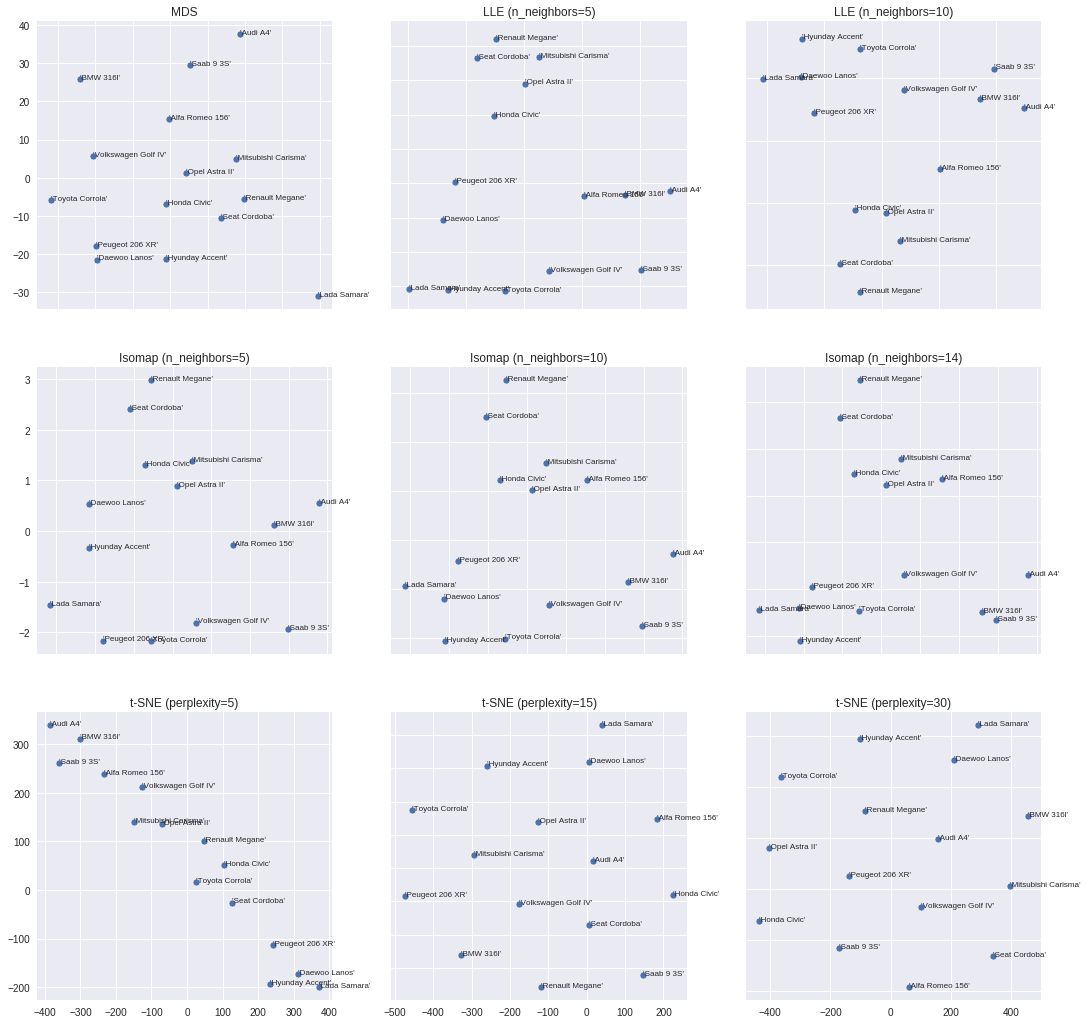

In [220]:
process(cars[:,1:], cars[:,0])

# Swill Roll

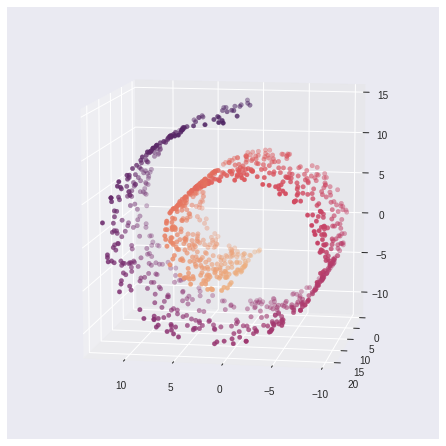

In [260]:
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
ax.scatter(swissroll[:,0], swissroll[:,1], swissroll[:,2], c=swissroll_index, cmap='flare')
ax.view_init(10,100)
plt.show()

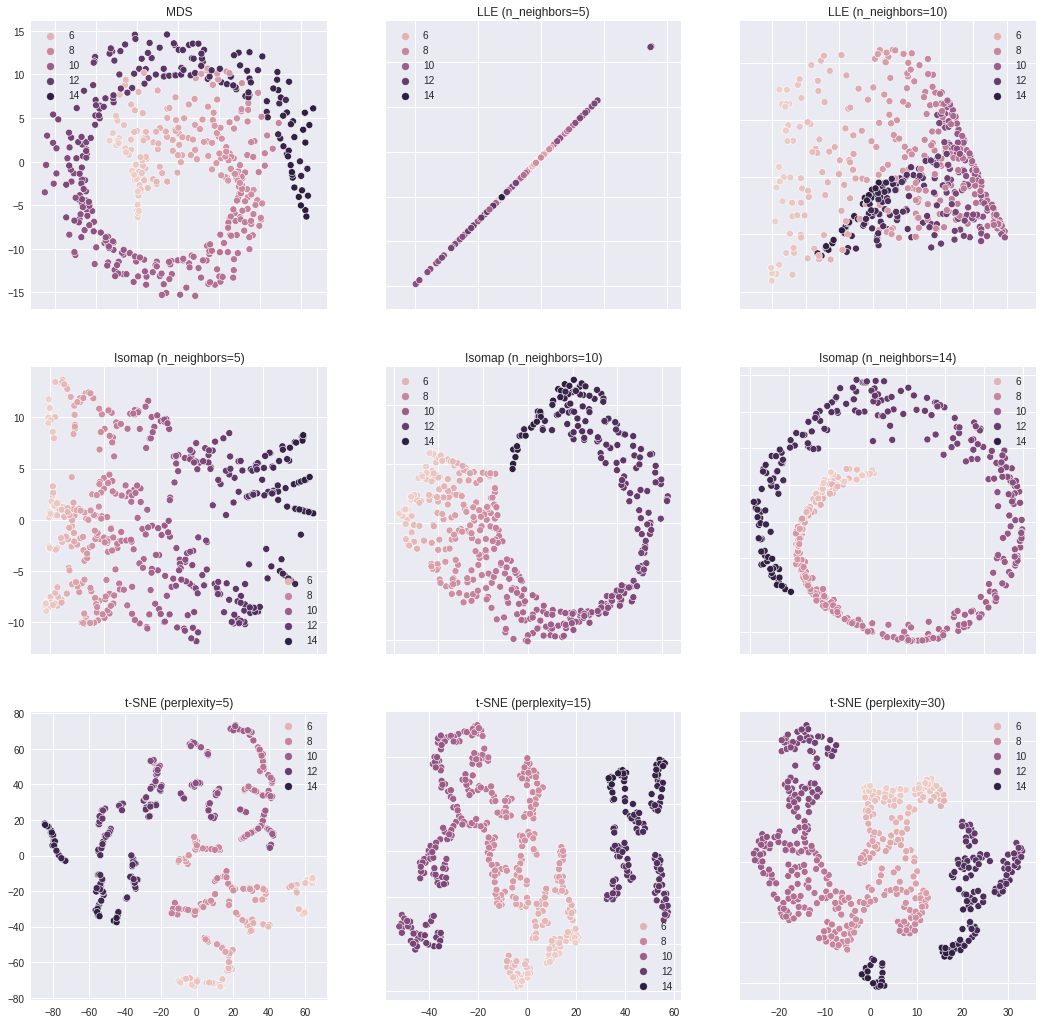

In [206]:
process(swissroll, index=swissroll_index)

# S Curve

Wykres 3D w kaształcie litery S.

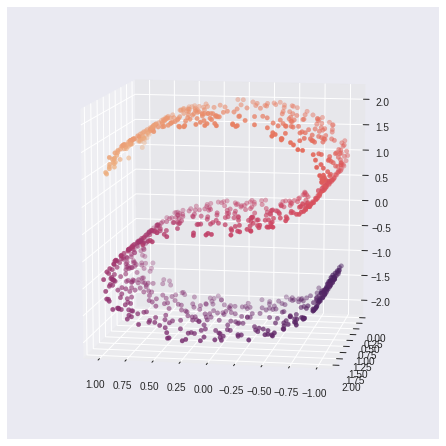

In [265]:
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
ax.scatter(s_curve[:,0], s_curve[:,1], s_curve[:,2], c=s_curve_index, cmap='flare')
ax.view_init(10,100)
plt.show()

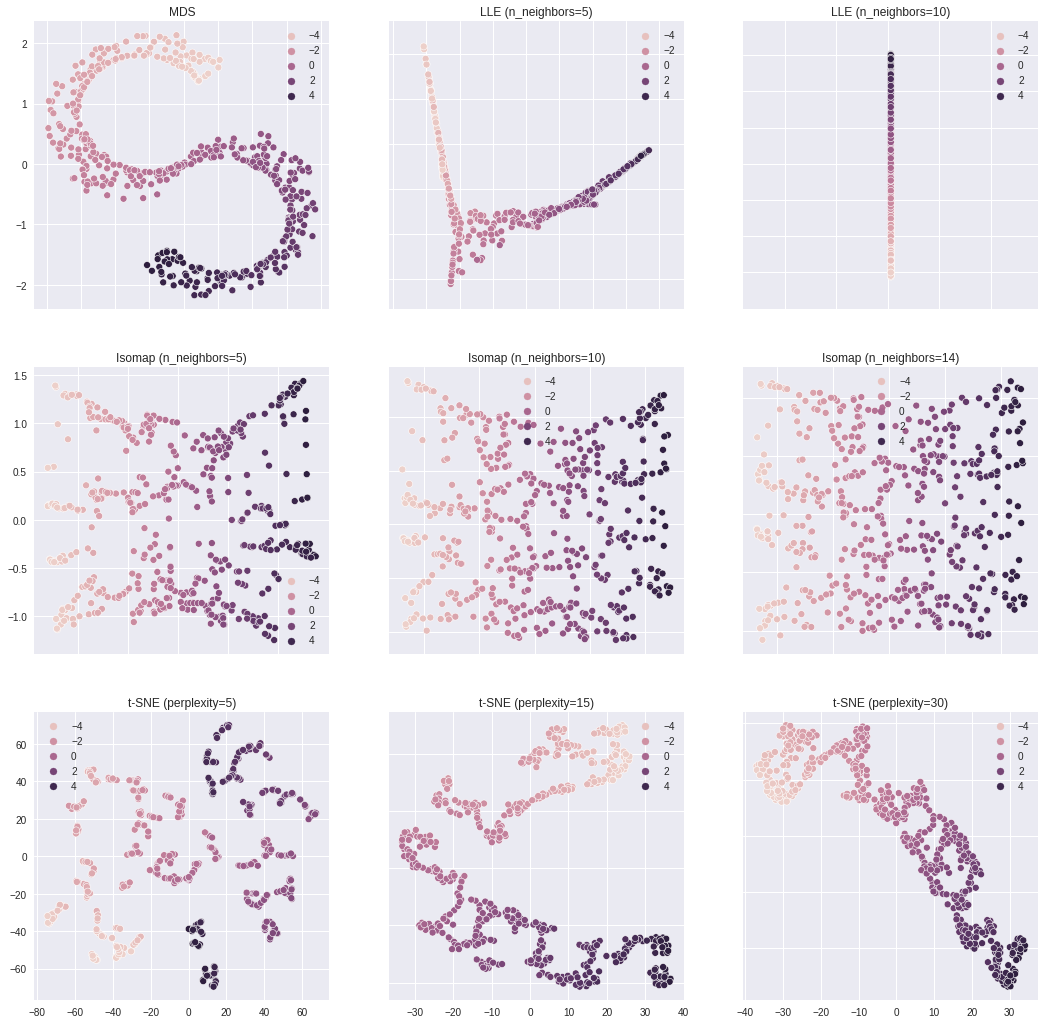

In [207]:
process(s_curve, index=s_curve_index)